# Generalised Forest Tuning - Figure 3

This is the code used to generate figure 3 of the paper "Generalising Random Forest Parameter Optimisation to Include Stability and Cost" by CHB Liu, BP Chamberlain, DA Little, A Cardoso (2017).

Please ensure you are using the anaconda environment `gft_env`. This is usually indicated by successfully importing the libraries below. If the library import resulted in any error, please try and run the `./setup_environment.sh` script again.

## Library Imports

In [1]:
import pandas as pd # You need pandas 0.19+
import numpy as np
import matplotlib.pyplot as plt
from data_loader import *
from evaluator import *

## Loading Pregenerated Data

We use pre-generated data here as it takes a long time to run the grid-search required to obtain the metrics for different combinations of number of trees and max. tree depth.

The code for running grid-search is provided towards the end.

In [2]:
AUC = np.loadtxt("../results/trees_depth_AUC.csv", 
                 delimiter=',')
RMSPD = np.loadtxt("../results/trees_depth_RMSPD.csv", 
                   delimiter=',')
runtime = np.loadtxt("../results/trees_depth_runtime.csv", 
                     delimiter=',')

## Plot Generation

AUC

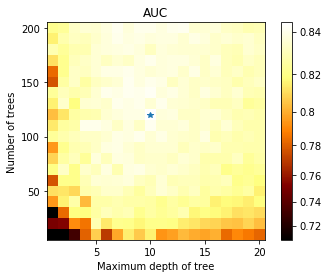

In [3]:
plt.clf()

plt.imshow(np.exp(np.exp(np.exp((AUC-np.min(AUC)+0.000001)))), 
           cmap='afmhot', origin='lower',
           vmin=np.exp(np.exp(np.exp(0.06))), 
           vmax=np.exp(np.exp(np.exp(np.max(AUC)-np.min(AUC)))))

plt.tick_params(which='both', top='off', right='off')
plt.yticks([4, 9, 14, 19], [50, 100, 150, 200])
plt.xticks([4, 9, 14, 19], [5, 10, 15, 20])

plt.ylabel('Number of trees')
plt.xlabel('Maximum depth of tree')
plt.title('AUC')

cbar = plt.colorbar(
    ticks=np.exp(np.exp(np.exp(np.linspace(0.72, 0.84, 7)
                               - np.min(AUC) + 0.000001)))
)
cbar.ax.set_yticklabels(np.linspace(0.72, 0.84, 7)) 

plt.plot(9, 11, '*')

# plt.savefig("../results/trees_depth_AUC.pdf", 
#             bbox_inches='tight')
plt.show()

RMSPD

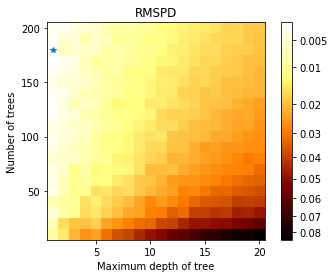

In [4]:
plt.clf()

plt.imshow(np.sqrt(RMSPD), cmap='afmhot_r', origin='lower',
           vmin=np.sqrt(np.min(RMSPD)), 
           vmax=np.sqrt(np.max(RMSPD)))

plt.tick_params(which='both', top='off', right='off')
plt.yticks([4, 9, 14, 19], [50, 100, 150, 200])
plt.xticks([4, 9, 14, 19], [5, 10, 15, 20])

plt.ylabel('Number of trees')
plt.xlabel('Maximum depth of tree')
plt.title('RMSPD')

cbar = plt.colorbar(ticks=np.sqrt([0.005, 0.01, 0.02, 0.03, 
                                   0.04, 0.05, 0.06, 0.07, 0.08]))
cbar.ax.set_yticklabels([0.005, 0.01, 0.02, 0.03, 
                         0.04, 0.05, 0.06, 0.07, 0.08]) 
cbar.ax.invert_yaxis()

plt.plot(0, 17, '*')

# plt.savefig("../results/trees_depth_RMSPD.pdf", 
#             bbox_inches='tight')
plt.show()

Runtime

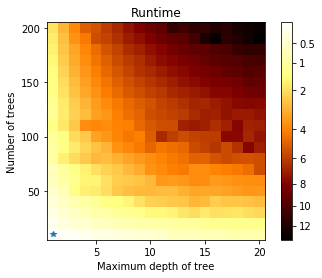

In [5]:
plt.clf()

plt.imshow(np.sqrt(runtime), cmap='afmhot_r', origin='lower',
           vmin=np.sqrt(np.min(runtime)), 
           vmax=np.sqrt(np.max(runtime)))

plt.tick_params(which='both', top='off', right='off')
plt.yticks([4, 9, 14, 19], [50, 100, 150, 200])
plt.xticks([4, 9, 14, 19], [5, 10, 15, 20])

plt.ylabel('Number of trees')
plt.xlabel('Maximum depth of tree')
plt.title('Runtime')

cbar = plt.colorbar(ticks=np.sqrt([0.5, 1, 2, 4, 6, 8, 10, 12]))
cbar.ax.set_yticklabels([0.5, 1, 2, 4, 6, 8, 10, 12]) 
cbar.ax.invert_yaxis()

plt.plot(0, 0, '*')

# plt.savefig("../results/trees_depth_runtime.pdf", 
#             bbox_inches='tight')
plt.show()

AUC $-$ RMSPD $-$ 0.01 $\times$ Runtime

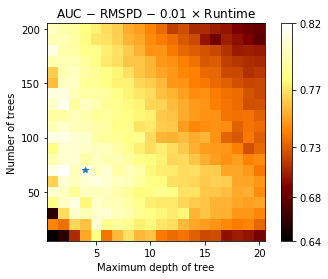

In [6]:
plt.clf()

obj = 1 * AUC - 1 * RMSPD - 0.01 *  runtime

plt.imshow(np.exp(np.exp(obj)), cmap='afmhot', origin='lower',
           vmin=np.exp(np.exp(np.min(obj))), 
           vmax=np.exp(np.exp(np.max(obj))))

plt.tick_params(which='both', top='off', right='off')
plt.yticks([4, 9, 14, 19], [50, 100, 150, 200])
plt.xticks([4, 9, 14, 19], [5, 10, 15, 20])

plt.ylabel('Number of trees')
plt.xlabel('Maximum depth of tree')
plt.title('AUC $-$ RMSPD $-$ 0.01 $\\times$ Runtime')

cbar = plt.colorbar(ticks=np.exp(np.exp(np.linspace(np.min(obj), np.max(obj), 5))))
cbar.ax.set_yticklabels(np.round(np.linspace(np.min(obj), np.max(obj), 5), 2))
#cbar.ax.invert_yaxis()

plt.plot(3, 6, '*')

# plt.savefig("../results/trees_depth_objective.pdf", 
#             bbox_inches='tight')

plt.show()

2 $\times$ AUC $-$ RMSPD $-$ 0.005 $\times$ Runtime

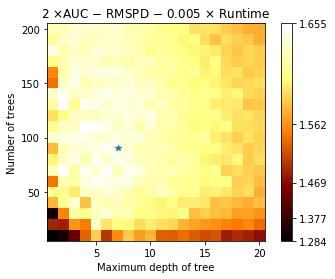

In [7]:
plt.clf()

obj = 2 * AUC - 1 * RMSPD - 0.005 * runtime

plt.imshow(np.exp(np.exp(obj)), cmap='afmhot', origin='lower',
           vmin=np.exp(np.exp(np.min(obj))), 
           vmax=np.exp(np.exp((np.max(obj)))))

plt.tick_params(which='both', top='off', right='off')
plt.yticks([4, 9, 14, 19], [50, 100, 150, 200])
plt.xticks([4, 9, 14, 19], [5, 10, 15, 20])

plt.ylabel('Number of trees')
plt.xlabel('Maximum depth of tree')
plt.title('2 $\\times $AUC $-$ RMSPD $-$ 0.005 $\\times$ Runtime')

cbar = plt.colorbar(
    ticks=np.exp(np.exp(np.linspace(np.min(obj), np.max(obj), 5)))
)
cbar.ax.set_yticklabels(
    np.round(np.linspace(np.min(obj), np.max(obj), 5), 3)
)

plt.plot(6, 8, '*')

# plt.savefig("../results/trees_depth_objective2.pdf", 
#              bbox_inches='tight')

plt.show()

## Code For Grid Search

Warning: It takes a very long time to run!

In [ ]:
orange_small_features, _, _, orange_small_upselling_labels = \
    get_and_process_orange_small_data()
    
# Do train validation split
# We select the first <prop> data as train data, the rest will be
# the hold out validation set
orange_small_features_train, orange_small_features_val, \
orange_small_upselling_labels_train, orange_small_upselling_labels_val = \
    split_train_val_data(orange_small_features,
                         orange_small_upselling_labels,
                         prop=0.5)

In [ ]:
# Very long running process
# Perfrom a grid-search across number of trees and maximum tree
# depth to find their AUC, RMSPD and runtime

num_trees = range(10, 210, 10)
max_depth = range(1, 21, 1)

AUC = np.zeros(shape=(len(num_trees), len(max_depth)))
RMSPD = np.zeros(shape=(len(num_trees), len(max_depth)))
runtime = np.zeros(shape=(len(num_trees), len(max_depth)))

for i in num_trees:
    print("Num trees: " + str(i))
    for j in max_depth:
        performance = \
            train_and_get_RF_performance(
                np.array([i, j, 0.5]), 
                orange_small_features_train,
                orange_small_features_val,
                orange_small_upselling_labels_train,
                orange_small_upselling_labels_val,
                nrun=5)
        AUC[num_trees.index(i), max_depth.index(j)] = \
            performance['AUC']
        RMSPD[num_trees.index(i), max_depth.index(j)] = \
            performance['RMSPD']
        runtime[num_trees.index(i), max_depth.index(j)] = \
            performance['Runtime']
        
np.savetxt("../local_results/trees_depth_AUC.csv", 
           AUC, delimiter=',')
np.savetxt("../local_results/trees_depth_RMSPD.csv", 
           RMSPD, delimiter=',')
np.savetxt("../local_results/trees_depth_runtime.csv", 
           runtime, delimiter=',')